In [2]:
import pandas as pd

# Reads and displays the dataset
df = pd.read_csv("datasets/iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Separates the features (X) from the target variable (class) in the df
X = df.drop(columns="class")
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [7]:
clusters = kmeans.predict(X)
clusters


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [8]:
df['cluster'] = clusters
df

,sepal_length,sepal_width,petal_length,petal_width,class,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [24]:
import numpy as np

# Finds the majority class for each cluster
class_to_index = {}
index_to_class = {}
for cluster in range(3):
    cluster_indices = np.where(clusters == cluster)
    original_classes = df.loc[cluster_indices, 'class']
    most_common = original_classes.mode()[0]
    class_to_index[most_common] = cluster
    index_to_class[cluster] = most_common

class_to_index, index_to_class

({'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2},
 {0: 'Iris-virginica', 1: 'Iris-setosa', 2: 'Iris-versicolor'})

In [ ]:
df['class_index'] = df['class'].apply(lambda x: class_to_index[x])
df

,sepal_length,sepal_width,petal_length,petal_width,class,cluster,class_index
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0


In [20]:
# Calculates the accuracy
accuracy = np.mean(df['class_index'] == df['cluster'])
accuracy

0.8866666666666667

In [16]:
# Select two features for visualization
feature_x = df.columns[0]
feature_y = df.columns[1]

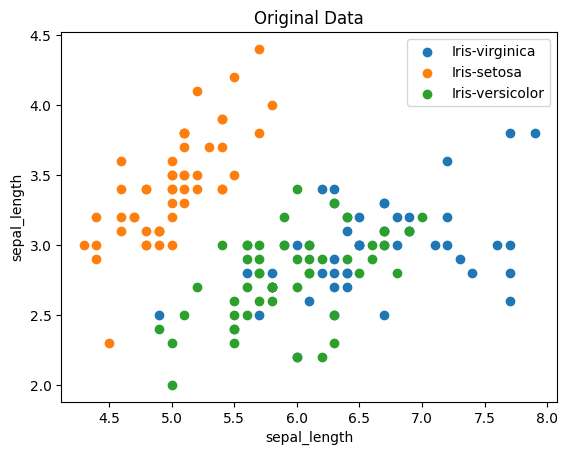

In [22]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.scatter(df[df['class_index'] == i][feature_x], df[df['class_index'] == i][feature_y], label=index_to_class[i])

plt.title('Original Data')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[0])
plt.legend()
plt.show()

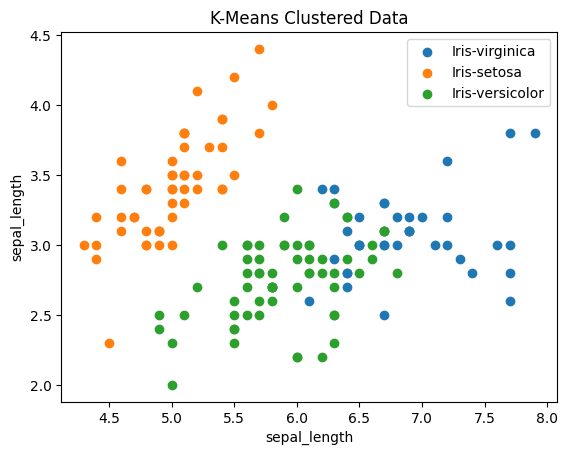

In [23]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.scatter(df[df['cluster'] == i][feature_x], df[df['cluster'] == i][feature_y], label=index_to_class[i])

plt.title('K-Means Clustered Data')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[0])
plt.legend()
plt.show()